In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

##### Load and display the original image

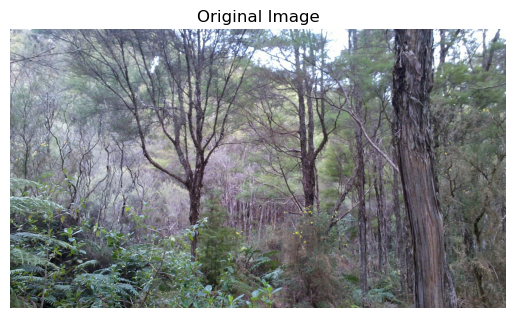

In [3]:
img_bgr = cv2.imread(r"C:\Users\bbuser\Desktop\Typical_New_Zealand_scenic_walk_view.jpg")
if img_bgr is None:
    raise FileNotFoundError("Image not found! Check the path.")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

##### Convert image to HSV and split channels

In [4]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_hsv)

##### Enhance contrast by applying histogram equalization on the V channel

In [5]:
v_eq = cv2.equalizeHist(v)
img_hsv_eq = cv2.merge([h, s, v_eq])

##### Increase saturation by multiplying the S channel and clipping

In [8]:
s_enhanced = s.astype(float) * 1.5
s_enhanced = np.clip(s_enhanced, 0, 255).astype('uint8')

##### Merge channels with enhanced saturation and equalized brightness

In [10]:
img_hsv_sat = cv2.merge([h, s_enhanced, v_eq])

##### Convert HSV images back to RGB for display

In [11]:
img_contrast_enhanced = cv2.cvtColor(img_hsv_eq, cv2.COLOR_HSV2RGB)
img_saturation_enhanced = cv2.cvtColor(img_hsv_sat, cv2.COLOR_HSV2RGB)

##### Display all images side-by-side

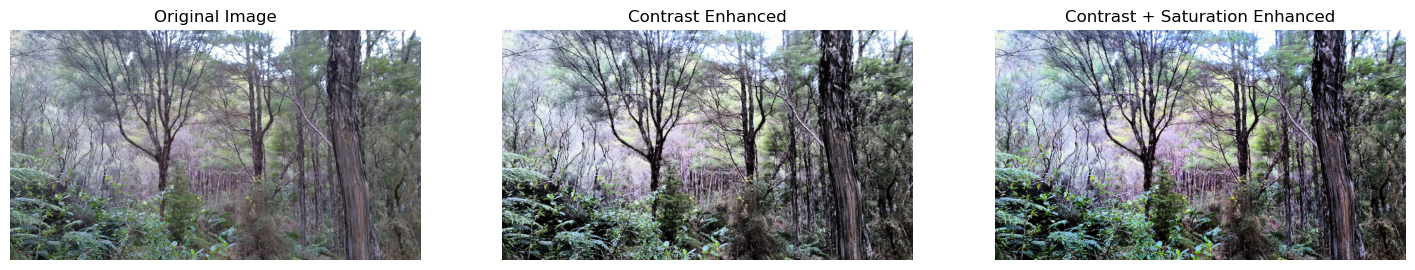

In [13]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_contrast_enhanced)
plt.title("Contrast Enhanced")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_saturation_enhanced)
plt.title("Contrast + Saturation Enhanced")
plt.axis('off')

plt.show()